In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF
import imageio
import os

In [2]:
pics = np.empty((1000,64,64))
for i,f in enumerate(os.listdir('../../lfwcrop_grey/faces/')):
    pics[i] = np.array(imageio.imread('../../lfwcrop_grey/faces/' + f))
    if i >= 999:
        break

In [20]:
pics[1]

array([[ 53.,  56.,  59., ..., 171., 171., 175.],
       [ 54.,  58.,  61., ..., 171., 172., 177.],
       [ 55.,  58.,  61., ..., 174., 174., 179.],
       ...,
       [ 85.,  94., 106., ...,  72.,  73.,  79.],
       [ 85.,  92., 103., ...,  69.,  73.,  81.],
       [ 84.,  89.,  98., ...,  62.,  64.,  72.]])

In [11]:
fig, ax = plt.subplots(4,5)
counter = 0
for i in range(4):
    for j in range(5):
        pic = imageio.imread(filelist[counter])
        ax[i,j].imshow(pic, cmap='gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        counter += 1

avgPic = np.average(pics, axis=0)

fig, ax = plt.subplots(1,1)
ax.imshow(avgPic, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

NameError: name 'filelist' is not defined

In [12]:
X = np.reshape(pics, (1000,4096))

In [13]:
nmf = NMF(n_components=20, random_state=0)
nmf.fit(X)
H = nmf.components_

In [21]:
W = nmf.transform(X)

In [22]:
W[1]

array([2.05969295, 0.51114378, 4.44915696, 2.95723781, 8.52781709,
       3.64153884, 1.33561435, 4.46465002, 3.7392375 , 4.75295419,
       1.20112774, 4.62417649, 2.51085244, 0.51328304, 2.00044966,
       5.32481611, 9.79576729, 0.        , 4.13544298, 0.65504078])

In [27]:
counter = 0
for i in range(4096):
    if H[9,i] == 0:
        counter += 1
print(counter)

1504


[]

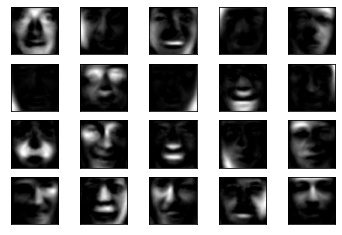

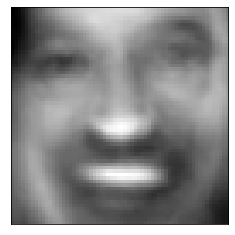

In [79]:
nmfPics = np.reshape(H, (20,64,64))
fig, ax = plt.subplots(4,5)
counter = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(nmfPics[counter], cmap='gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        counter += 1

avgPic = np.average(nmfPics, axis=0)

fig, ax = plt.subplots(1,1)
ax.imshow(avgPic, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

In [17]:
pca = PCA(n_components=20, random_state=0)
pca.fit(X)
Eigenfaces = pca.components_

In [19]:
Eigenfaces[4]

array([-0.0069209 , -0.00869675, -0.01195561, ..., -0.03304471,
       -0.03191738, -0.02981198])

[]

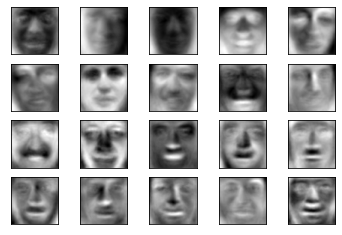

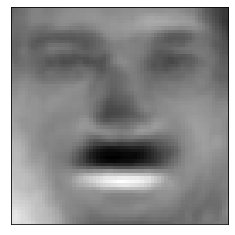

In [81]:
pcaPics = np.reshape(Eigenfaces, (20,64,64))
fig, ax = plt.subplots(4,5)
counter = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(pcaPics[counter], cmap='gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        counter += 1

avgPic = np.average(pcaPics, axis=0)

fig, ax = plt.subplots(1,1)
ax.imshow(avgPic, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])

In [76]:
ica = FastICA(n_components=20, random_state=0)
ica.fit(X)
IndependentFaces = ica.components_

[]

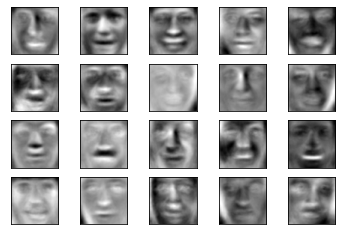

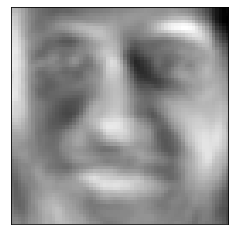

In [82]:
icaPics = np.reshape(IndependentFaces, (20,64,64))

fig, ax = plt.subplots(4,5)
counter = 0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(icaPics[counter], cmap='gray')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        counter += 1

avgPic = np.average(icaPics, axis=0)

fig, ax = plt.subplots(1,1)
ax.imshow(avgPic, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])